### 2D Prediction using DeepCell

Repo: https://github.com/vanvalenlab/deepcell-tf/tree/master

Installation

In [1]:
%pip install --user deepcell

Note: you may need to restart the kernel to use updated packages.


Libraries

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import nibabel as nib

Data

In [2]:
# X_names_nuclei = sorted(glob('../data/Gr4/RawImages/Nuclei/*.nii.gz'))
# X_nuclei = list(map(nib.load, X_names_nuclei))
# X_nuclei = [x.get_fdata() for x in X_nuclei]
X_nuclei = nib.load('../data/Gr4/RawImages/Nuclei/20190806_E3_DAPI_decon_0.5.nii.gz')
X_nuclei = X_nuclei.get_fdata()

In [3]:
# X_names_membrane = sorted(glob('../data/Gr4/RawImages/Membrane/*.nii.gz'))
# X_membrane = list(map(nib.load, X_names_membrane))
# X_membrane = [x.get_fdata() for x in X_membrane]

X_membrane = nib.load('../data/Gr4/RawImages/Membrane/20190806_E3_mGFP_decon_0.5.nii.gz')
X_membrane = X_membrane.get_fdata()

In [4]:
img = np.zeros((
    X_nuclei.shape[0],
    X_nuclei.shape[1],
    X_nuclei.shape[2],
    2
), dtype=np.uint8)

img[..., 0] = X_nuclei[..., 0]
img[..., 1] = X_membrane[..., 0]

In [5]:
from deepcell.utils.plot_utils import create_rgb_image

idx = 270
img_slice = img[:, :, idx, :]
rgb_img = create_rgb_image(img, channel_colors=['blue', 'green'])
print(rgb_img.shape)

(1024, 1024, 541, 3)


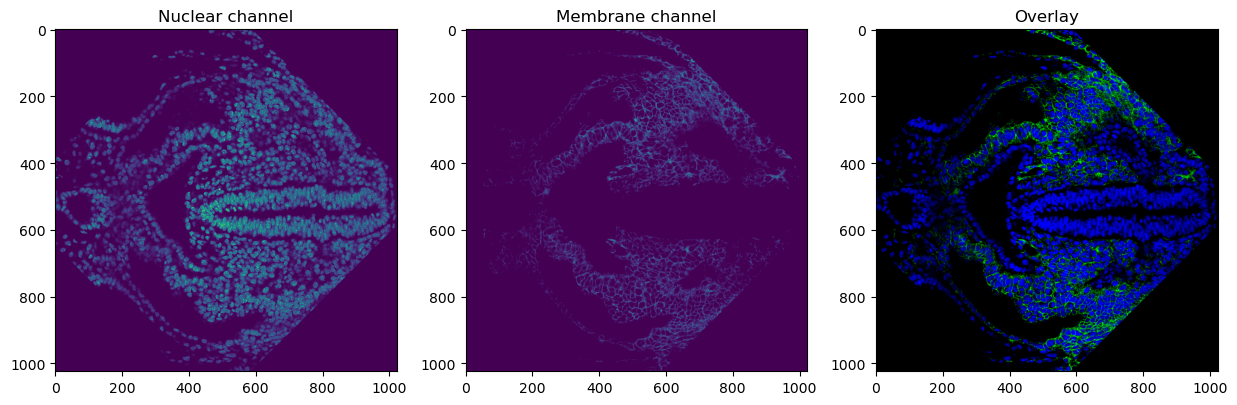

In [6]:
# select index for displaying
idx = 270

# plot the data
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img[..., idx, 0])
ax[1].imshow(img[..., idx, 1])
ax[2].imshow(rgb_img[..., idx, :])

ax[0].set_title('Nuclear channel')
ax[1].set_title('Membrane channel')
ax[2].set_title('Overlay')

plt.show()

### Predictions

In [10]:
from deepcell.applications import Mesmer
app = Mesmer()

INFO:root:Checking for cached data


ValueError: 
DEEPCELL_ACCESS_TOKEN not found.
Please set your access token to the DEEPCELL_ACCESS_TOKEN
environment variable.
For example:

	export DEEPCELL_ACCESS_TOKEN=<your-token>.

If you don't yet have a token, you can create one at
https://users.deepcell.org

In [ ]:
seg_predictions = app.predict(img_slice, image_mpp=.45, compartment='nuclear')

In [ ]:
from deepcell.utils.plot_utils import make_outline_overlay
overlay_data = make_outline_overlay(rgb_data=rgb_img[..., idx, :], predictions=seg_predictions)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(rgb_img[..., idx, :])
ax[1].imshow(overlay_data)
ax[0].set_title('Raw data')
ax[1].set_title('Predictions')
plt.show()